## Kmean and phân cụm tối ưu

K = 2, Silhouette Score = 0.3667
K = 3, Silhouette Score = 0.2613


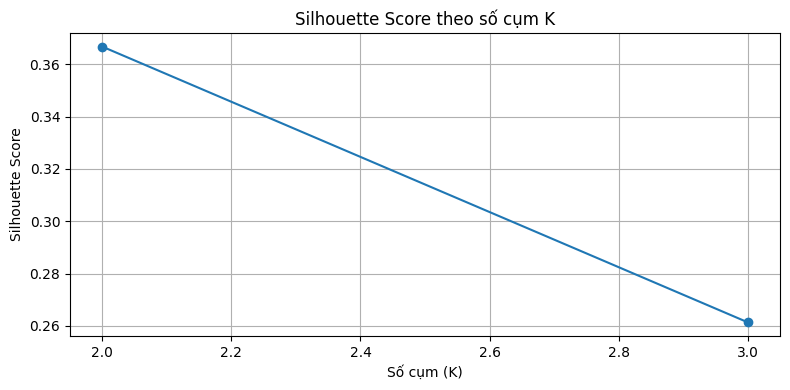

✅ Số cụm tốt nhất: 2
✅ Đã lưu kết quả phân cụm vào file synthetic_user_features_clustered.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---- STEP 1: Load dữ liệu ----
df = pd.read_csv("synthetic_user_features.csv")

# ---- STEP 2: Lựa chọn feature (loại bỏ userid và courseid) ----
features = df.drop(columns=['userid', 'courseid'])

# ---- STEP 3: Chuẩn hoá dữ liệu với StandardScaler ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ---- STEP 4: Tìm số cụm tối ưu bằng Silhouette Score ----
sil_scores = []
k_range = range(2, 4)  # Thử từ 2 đến 9 cụm

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

# ---- STEP 5: Vẽ biểu đồ Silhouette Score theo số cụm ----
plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score theo số cụm K")
plt.xlabel("Số cụm (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- STEP 6: Chọn số cụm tốt nhất ----
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"✅ Số cụm tốt nhất: {best_k}")

# ---- STEP 7: Phân cụm với số cụm tốt nhất ----
final_model = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cluster_labels = final_model.fit_predict(X_scaled)

# ---- STEP 8: Gắn nhãn cụm vào DataFrame và lưu ra file mới ----
df['cluster'] = cluster_labels
df.to_csv("synthetic_user_features_clustered.csv", index=False)
print("✅ Đã lưu kết quả phân cụm vào file synthetic_user_features_clustered.csv")



/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_7962/82961302.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


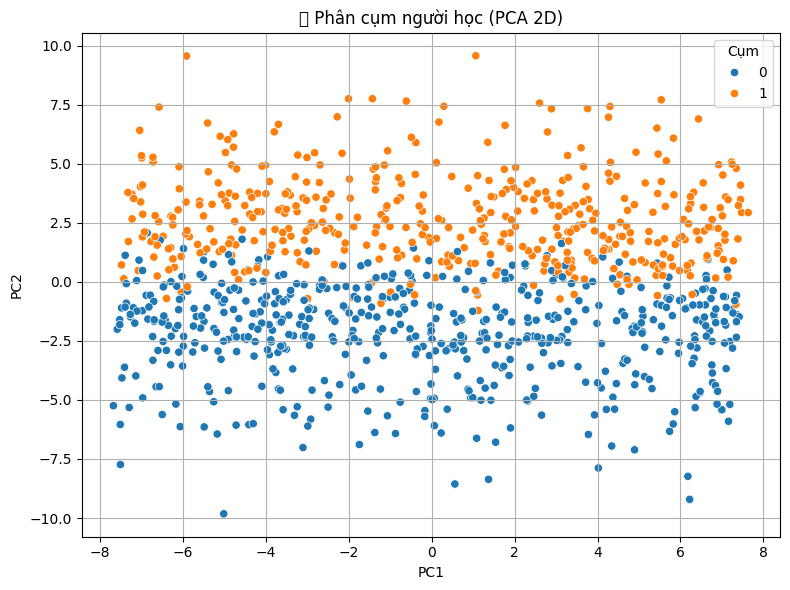

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_7962/82961302.py:51: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


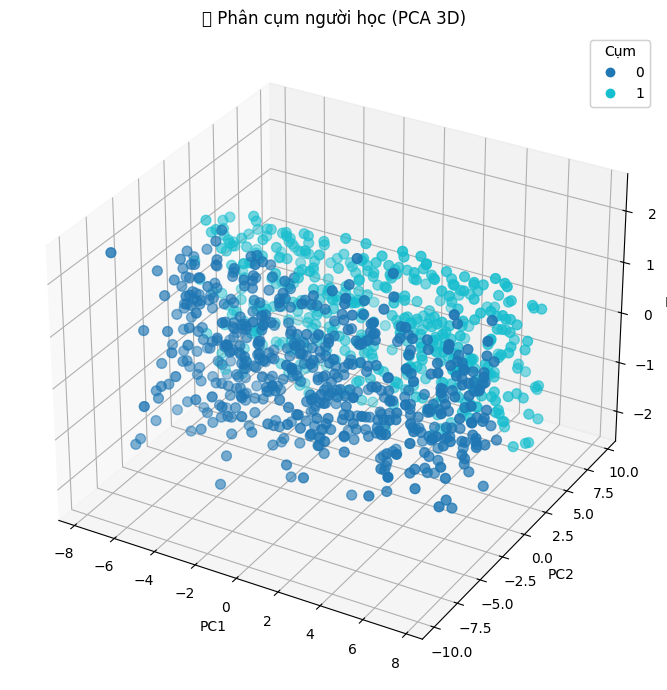

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_7962/82961302.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/Users/nguyenhuuloc/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


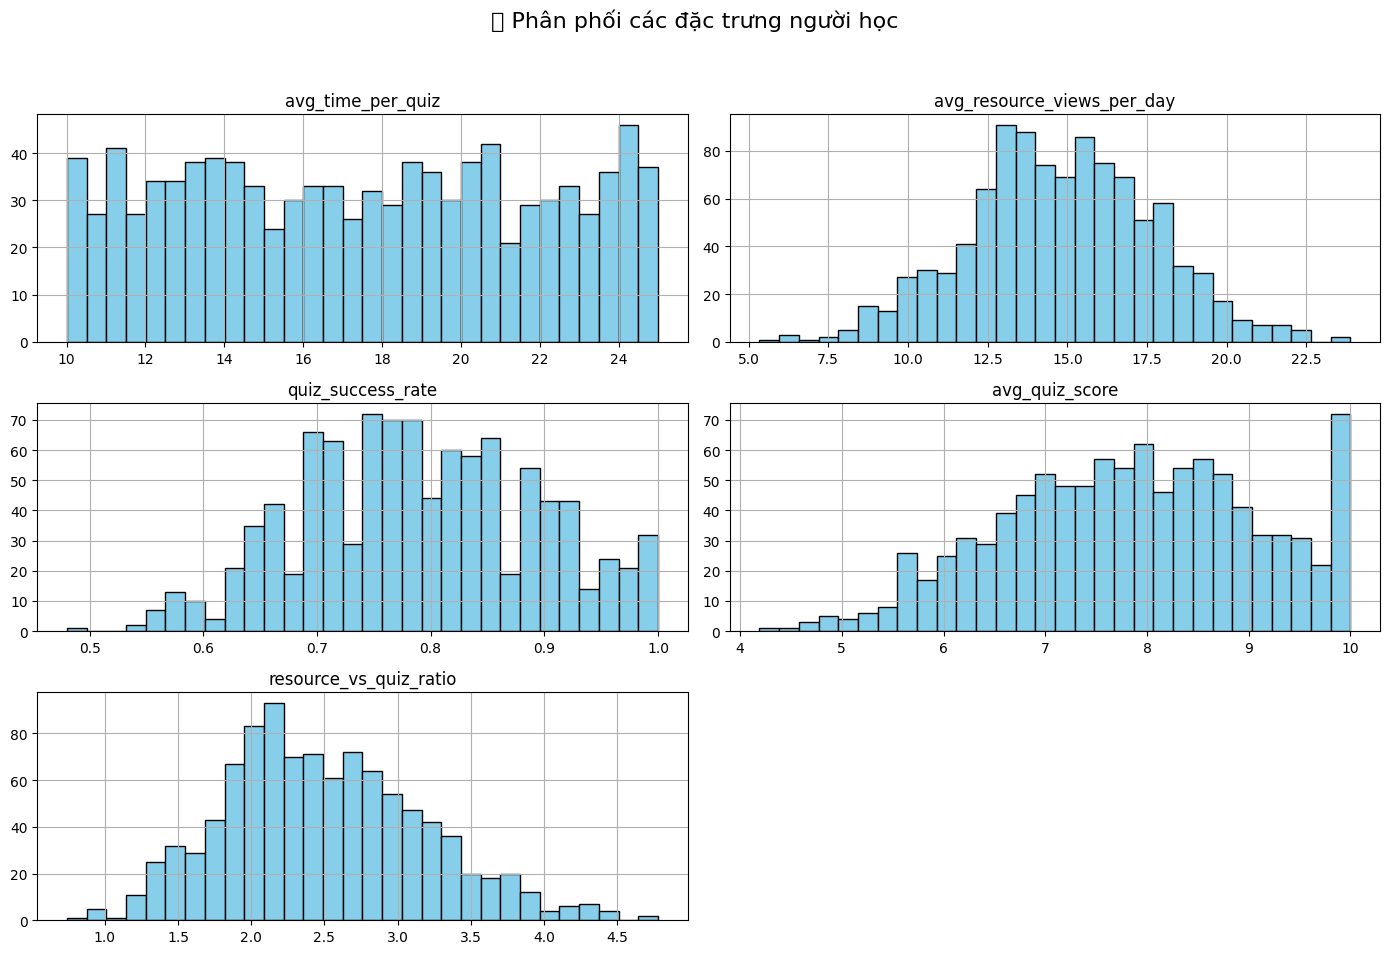

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def plot_pca_2d(csv_path):
    df = pd.read_csv(csv_path)
    features = df.drop(columns=['userid', 'courseid', 'cluster'])

    # PCA 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(features)
    df['PC1'] = X_pca[:, 0]
    df['PC2'] = X_pca[:, 1]

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='tab10')
    plt.title("📊 Phân cụm người học (PCA 2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title='Cụm')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    from mpl_toolkits.mplot3d import Axes3D  # 3D plot cần import này

def plot_pca_3d(csv_path):
    df = pd.read_csv(csv_path)
    features = df.drop(columns=['userid', 'courseid', 'cluster'])

    # PCA 3D
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(features)
    df['PC1'], df['PC2'], df['PC3'] = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'],
                         c=df['cluster'], cmap='tab10', s=50)
    ax.set_title("🧠 Phân cụm người học (PCA 3D)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

    legend = ax.legend(*scatter.legend_elements(), title="Cụm")
    ax.add_artist(legend)

    plt.tight_layout()
    plt.show()
    
def plot_feature_histograms(csv_path):
    df = pd.read_csv(csv_path)
    features = df.drop(columns=['userid', 'courseid', 'cluster'], errors='ignore')

    features.hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
    plt.suptitle("📈 Phân phối các đặc trưng người học", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
if __name__ == '__main__':
    csv_path = "synthetic_user_features_clustered.csv"

    plot_pca_2d(csv_path)
    plot_pca_3d(csv_path)
    plot_feature_histograms(csv_path)        